# Importing library and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#Checking null vales in dataset
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# Data Cleaning and Preparation

In [6]:
#Converting total charges to numeric value
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].head()

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65


In [7]:
df['TotalCharges'].isnull().sum()

np.int64(11)

In [9]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
df['TotalCharges'].isnull().sum()

np.int64(0)

In [12]:
#created a new column as retained from 'Churn' column
df['retained'] = (df['Churn'] == 'No').astype(int)

In [13]:
df['retained']

,retained
0,1
1,1
2,0
3,1
4,0
...,...
7038,1
7039,1
7040,1
7041,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Exploratory Data Analysis(EDA)

In [23]:
# Counting of retained and non retained
df['retained'].value_counts()

,count
retained,
1,5174
0,1869


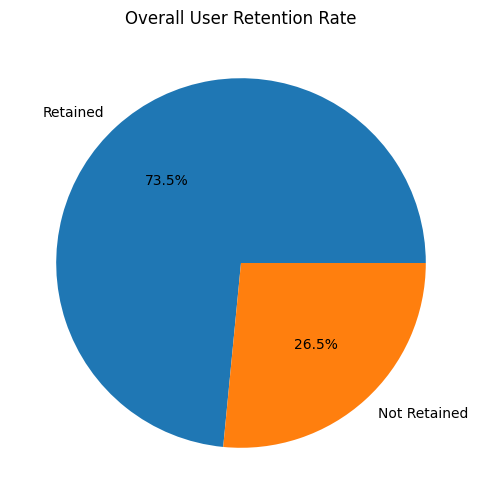

In [25]:
# What is the overall retention rate?
counts = df['retained'].value_counts()
label = ['Not Retained' if x == 0 else 'Retained' for x in counts.index]

plt.figure(figsize=(6, 6))
counts.plot(kind='pie', autopct='%1.1f%%', labels = label)
plt.title('Overall User Retention Rate')
plt.ylabel('')
plt.show()

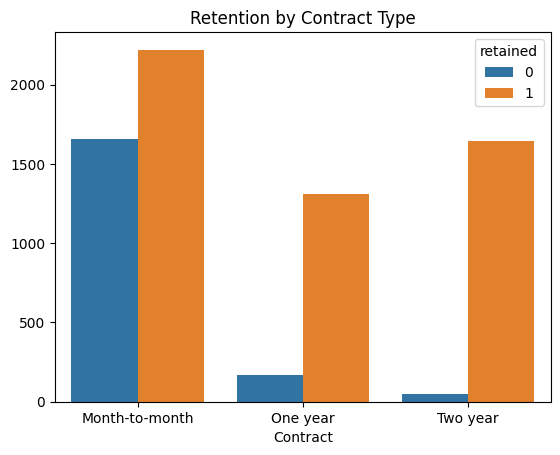

In [29]:
sns.countplot(x='Contract', hue='retained', data=df)
plt.title('Retention by Contract Type')
plt.ylabel('')
plt.show()

Month-to-Month users have a much lower retention rate.

# Retention

In [33]:
df.groupby('OnlineSecurity')['retained'].mean()

,retained
OnlineSecurity,
No,0.582333
No internet service,0.925950
Yes,0.853888


In [42]:
# number of retention as per gender
df.groupby(['gender', 'Churn'])['Churn'].value_counts()

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
Name: count, dtype: int64

In [44]:
# total telecom charges as per gender
df.groupby('gender')['TotalCharges'].sum()

,TotalCharges
gender,
Female,7959341.575
Male,8112199.350


In [45]:
#We can use groupby to calculate the average retention rate for each group.
retention_by_security = df.groupby('OnlineSecurity')['retained'].mean() * 100
print(retention_by_security)

OnlineSecurity
No                     58.233276
No internet service    92.595020
Yes                    85.388806
Name: retained, dtype: float64


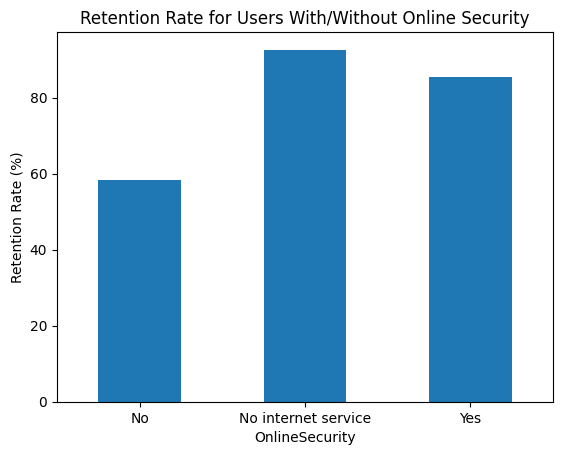

In [48]:
# Let's visualize this finding
retention_by_security.plot(kind='bar')
plt.title('Retention Rate for Users With/Without Online Security')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=0)
plt.show()

# Exporting Cleaned Data



In [49]:
df.to_csv('telco_data_for_tableau.csv', index=False)

Data successfully exported for Tableau.
